In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
bk = pd.read_excel('./data/Bank_Personal_Loan_Modelling.xlsx', sheet_name=1)

In [5]:
bk.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
print("Education: ", bk['Education'].unique())
print("Personal Loan: ", bk['Personal Loan'].unique())
print("Securities Account: ", bk['Securities Account'].unique())
print("CD Account: ", bk['CD Account'].unique())
print("Online: ", bk['Online'].unique())
print("CreditCard: ", bk['CreditCard'].unique())

Education:  [1 2 3]
Personal Loan:  [0 1]
Securities Account:  [1 0]
CD Account:  [0 1]
Online:  [0 1]
CreditCard:  [0 1]


In [12]:
bk.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [19]:
print("총 데이터 수: ", bk.shape[0] * bk.shape[1])
print("총 결측치 수: {} = 전체 데이터의 {:.2f}%".format(bk.isnull().sum().sum(), (bk.isnull().sum().sum() * 100) / (bk.shape[0] * bk.shape[1])))
print("Thera bank 고객의 나이는 {}세부터 {}세까지 있으며 평균 나이는 {:.1f}이다".format(bk['Age'].min(), bk['Age'].max(), bk['Age'].mean()))
print("Thera bank 고객의 평균 수입은 {:.1f}$이며, 최고수입은 {:.1f}$로 평균의 {:.1f}이다".format(bk['Income'].mean() * 100, bk['Income'].max() * 1000, bk['Income'].max() / bk['Income'].mean()))

총 데이터 수:  70000
총 결측치 수: 0 = 전체 데이터의 0.00%
Thera bank 고객의 나이는 23세부터 67세까지 있으며 평균 나이는 45.3이다
Thera bank 고객의 평균 수입은 7377.4$이며, 최고수입은 224000.0$로 평균의 3.0이다


In [20]:
""" 수입/월평균신용카드사용량/가족인원수와 대출 사이의 관계
원 평균 사용 금액을 구간화해서 특징
로지스틱 회귀 분석을 사용해서 신규 고객의 대출여부를 예측하는 모델 """

' 수입/월평균신용카드사용량/가족인원수와 대출 사이의 관계\n원 평균 사용 금액을 구간화해서 특징\n로지스틱 회귀 분석을 사용해서 신규 고객의 대출여부를 예측하는 모델 '

In [22]:
bk.duplicated().sum()

0

In [23]:
bk.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [24]:
bk.columns = ['id', 'age', 'exp', 'income', 'zip', 'fam', 'ccavg', 'edu', 'mort', 'loan', 'secu', 'cd', 'online', 'cc']
bk.columns

Index(['id', 'age', 'exp', 'income', 'zip', 'fam', 'ccavg', 'edu', 'mort',
       'loan', 'secu', 'cd', 'online', 'cc'],
      dtype='object')

In [25]:
bk1 = bk.drop(['id', 'zip'], axis=1, inplace=False)

In [26]:
bk1

,age,exp,income,fam,ccavg,edu,mort,loan,secu,cd,online,cc
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [33]:
df1 = bk1.groupby('loan')['income'].agg([np.mean, 'count'])
df1.rename(columns={'mean' : 'Income Mean', 'count' : 'Number of People'})

,Income Mean,Number of People
loan,,
0,66.237389,4520
1,144.745833,480


In [35]:
df2 = bk1.groupby('loan')['ccavg'].agg([np.mean, 'count'])
df2.rename(columns={'mean' : 'CCAvg Mean', 'count' : 'Number of People'})

,CCAvg Mean,Number of People
loan,,
0,1.728982,4520
1,3.905347,480


In [36]:
df3 = bk1.groupby('fam')['loan'].agg([np.mean, 'count'])

In [37]:
df3

,mean,count
fam,,
1,0.072690,1472
2,0.081790,1296
3,0.131683,1010
4,0.109656,1222


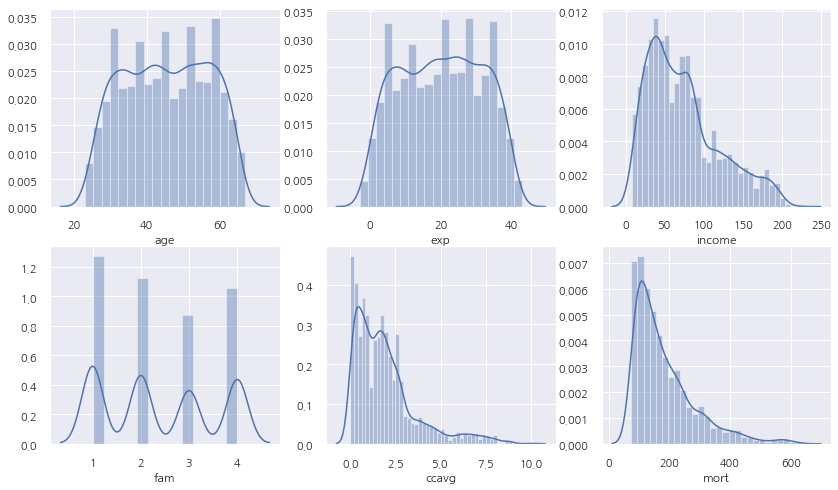

In [40]:
fig, ax = plt.subplots(2, 3, figsize=(14,8))

sns.distplot(bk1['age'], ax=ax[0,0])
sns.distplot(bk1['exp'], ax=ax[0,1])
sns.distplot(bk1['income'], ax=ax[0,2])
sns.distplot(bk1['fam'], ax=ax[1,0])
sns.distplot(bk1['ccavg'], ax=ax[1,1])
sns.distplot(bk1['mort'][bk1['mort'] != 0], ax=ax[1,2])

In [42]:
def drawline(plt, col):
  mean = bk1.describe().loc['mean', col]
  m25 = bk1.describe().loc['25%', col]
  m50 = bk1.describe().loc['50%', col]
  m75 = bk1.describe().loc['75%', col]
  plt.axvline(mean, color='red')
  plt.axvline(m25, color='blue')
  plt.axvline(m50, color='navy')
  plt.axvline(m75, color='purple')
  plt.legend({'Mean': mean, '25%' : m25, '50%' : m50, '75%' : m75})

C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


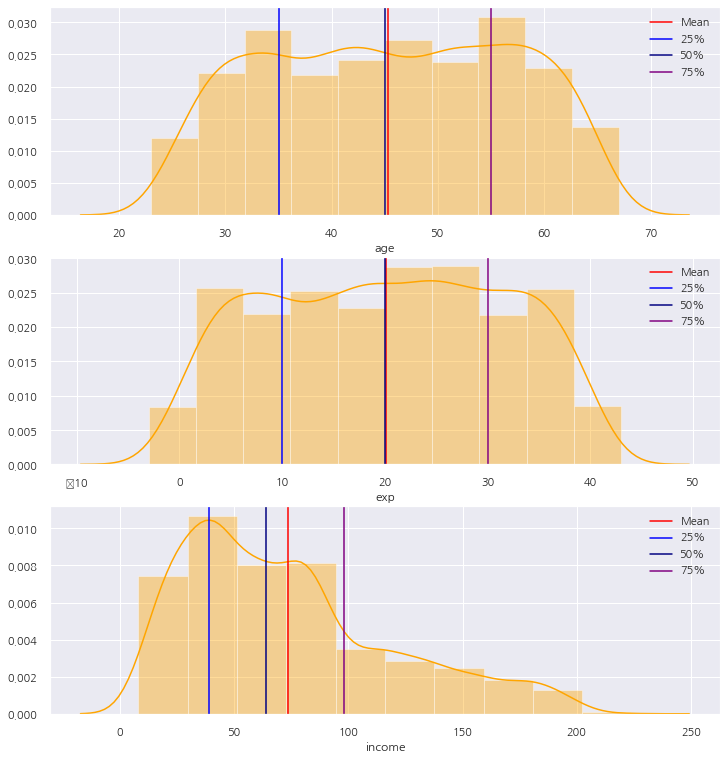

In [43]:
fig, ax = plt.subplots(3, 1, figsize=(12, 13))

pp = sns.distplot(bk1['age'], ax=ax[0], bins=10, color='orange')
drawline(pp, 'age')

pp = sns.distplot(bk1['exp'], ax=ax[1], bins=10, color='orange')
drawline(pp, 'exp')

pp = sns.distplot(bk1['income'], ax=ax[2], bins=10, color='orange')
drawline(pp, 'income')

C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


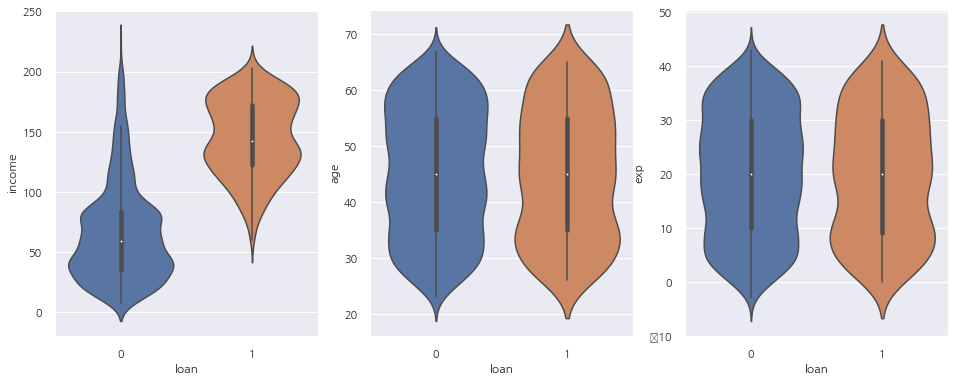

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

sns.violinplot(bk1['loan'], bk1['income'], ax=ax[0])
sns.violinplot(bk1['loan'], bk1['age'], ax=ax[1])
sns.violinplot(bk1['loan'], bk1['exp'], ax=ax[2])

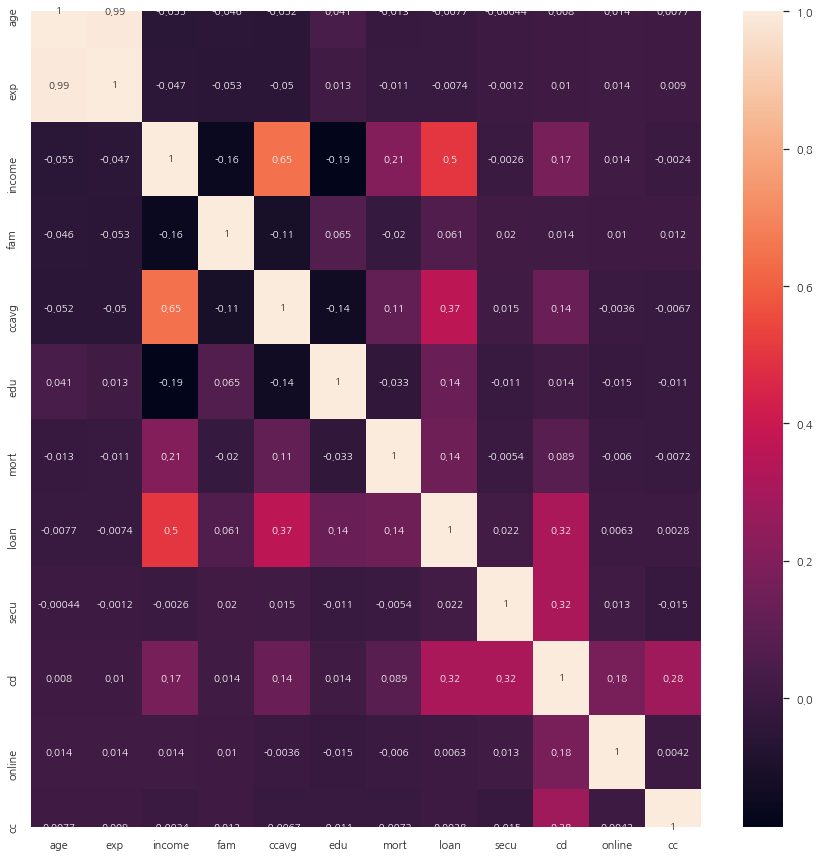

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

sns.heatmap(bk1.corr(), ax=ax, annot=True, fmt='.2g')

In [51]:
df4 = bk1[['ccavg', 'cc', 'loan']]
df4['ccavg_bin'] = pd.cut(df4['ccavg'], bins=[0,2,4,6,100], labels=['0-2', '3-4', '5-6', '7+'])
df4

C:\Users\lee45\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ccavg,cc,loan,ccavg_bin
0,1.6,0,0,0-2
1,1.5,0,0,0-2
2,1.0,0,0,0-2
3,2.7,0,0,3-4
4,1.0,1,0,0-2
...,...,...,...,...
4995,1.9,0,0,0-2
4996,0.4,0,0,0-2
4997,0.3,0,0,0-2
4998,0.5,0,0,0-2


In [52]:
df5 = df4.groupby(['ccavg_bin', 'cc'])['ccavg'].sum().reset_index()
df5

,ccavg_bin,cc,ccavg
0,0-2,0,2172.366667
1,0-2,1,930.333333
2,3-4,0,2361.250000
3,3-4,1,970.250000
4,5-6,0,1097.300000
5,5-6,1,413.533333
6,7+,0,1236.533333
7,7+,1,508.000000


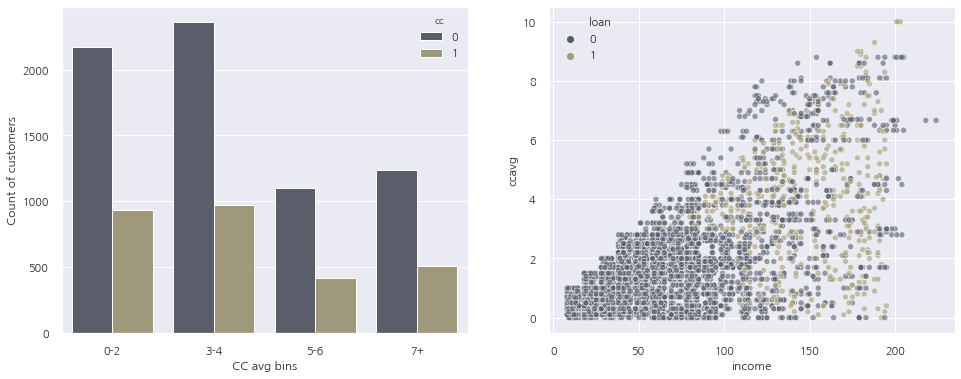

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.barplot(df5['ccavg_bin'], df5['ccavg'], hue=df5['cc'], palette='cividis', ax=ax[0]);
ax[0].set(xlabel='CC avg bins', ylabel='Count of customers')

sns.scatterplot(x='income', y='ccavg', data=bk1, ax=ax[1], hue='loan', palette='cividis', alpha=0.6)

In [55]:
import os

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn.preprocessing as preprocssing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import statsmodels.api as sm
import itertools
import time

In [56]:
feature_column = list(bk1.columns.difference(['loan']))

In [57]:
X = bk1[feature_column]
y = bk1['loan']

In [58]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, train_size=0.7, test_size=0.3, random_state=42)


In [60]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)

In [61]:
lrm = LogisticRegression(solver='liblinear', max_iter=2000)

In [62]:
lrm.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
coeff_df = pd.DataFrame(lrm.coef_)
coeff_df['Intercept'] = lrm.intercept_

In [64]:
coeff_df

,0,1,2,3,4,5,6,7,8,9,10,Intercept
0,-0.250034,-0.481869,0.228485,0.90614,1.319806,0.271172,0.755312,2.291312,0.068812,-0.312519,-0.313708,-4.414426


In [65]:
training_predict = lrm.predict(train_x)
print("학습 데이터를 넣었을 때 모델의 정확도: {:.4f}".format(metrics.accuracy_score(train_y, training_predict)))

학습 데이터를 넣었을 때 모델의 정확도: 0.9517


In [66]:
test_predict = lrm.predict(test_x)
print("테스트 데이터를 넣었을 때 모델의 정확도 {:.4f}".format(metrics.accuracy_score(test_y, test_predict)))

테스트 데이터를 넣었을 때 모델의 정확도 0.9527


In [67]:
logistic_cm = metrics.confusion_matrix(test_y, test_predict, labels=[1,0])
print(logistic_cm)

[[  95   49]
 [  22 1334]]


In [68]:
logistic_cm_df = pd.DataFrame(logistic_cm, index = [i for i in ['1', '0']], columns = [i for i in ['predict1', 'predict0']])

In [69]:
logistic_cm_df

,predict1,predict0
1,95,49
0,22,1334


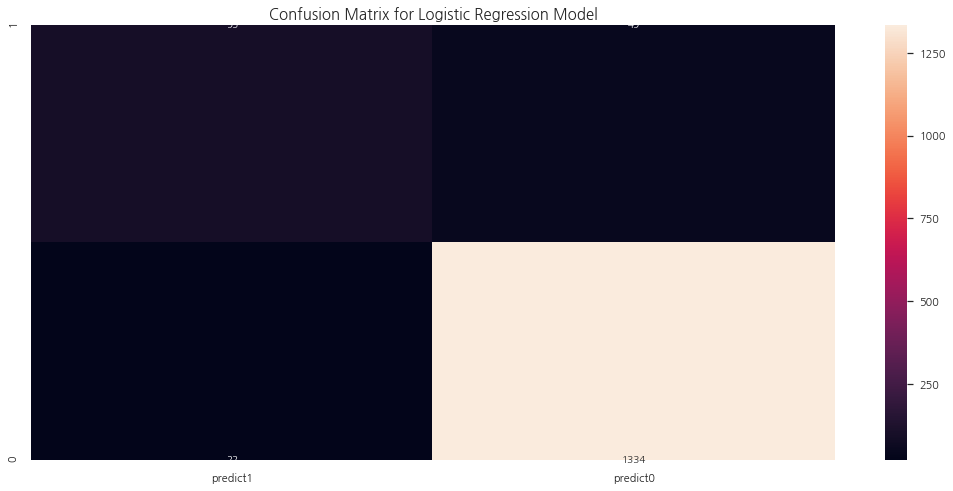

In [70]:
fig, ax = plt.subplots(1,1, figsize=(18,8))

plt.title("Confusion Matrix for Logistic Regression Model", size=15)
sns.heatmap(logistic_cm_df, annot=True, fmt='g', ax=ax)

In [71]:
print(metrics.classification_report(test_y, test_predict, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.81      0.66      0.73       144
           0       0.96      0.98      0.97      1356

    accuracy                           0.95      1500
   macro avg       0.89      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500

